# Exercise 2
Build Support vector machines (SVM) model with your selected stock / market index using all attributes to predict `daily returns` (decision).
(`daily returns` must first be converted into a decision class that will be used as the target(label), all other attributes must be grouped into classes)
Explain how the following kernels affects the performance of the model.
1. Linear kernel
2. Polynomial kernel
3. radial basis function (RBF) kernel
4. sigmoid kernel

In [1]:
import pandas as pd

pd.set_option('display.max_colwidth', None)
IBM = pd.read_csv('../Data/IBM.txt.zst', delimiter=' ', index_col='Date')
IBM.head(5)

,Open,High,Low,Close,Volume,Adjusted
Date,,,,,,
2007-01-03,97.180000,98.400002,96.260002,97.269997,9196800,63.127567
2007-01-04,97.250000,98.790001,96.879997,98.309998,10524500,63.802544
2007-01-05,97.599998,97.949997,96.910004,97.419998,7221300,63.224930
2007-01-08,98.500000,99.500000,98.349998,98.900002,10340000,64.185463
2007-01-09,99.080002,100.330002,99.070000,100.070000,11108200,64.944771


In [2]:
IBM.describe(include='all', datetime_is_numeric=True)

,Open,High,Low,Close,Volume,Adjusted
count,3692.000000,3692.000000,3692.000000,3692.000000,3.692000e+03,3692.000000
mean,147.198976,148.403180,146.074512,147.269085,5.576247e+06,113.375997
std,30.808862,30.780935,30.844083,30.796603,3.229710e+06,25.410689
min,72.739998,76.980003,69.500000,71.739998,1.027500e+06,48.040176
25%,124.189999,125.349998,123.072502,124.332496,3.482300e+06,90.296511
50%,144.750000,145.619995,143.830002,144.730003,4.653750e+06,120.980629
75%,168.847500,170.442501,167.659996,169.169998,6.660725e+06,132.155647
max,215.380005,215.899994,214.300003,215.800003,3.806350e+07,155.979538


First we compute the `Daily Returns` as according to the formular:
$r_{t+1} = \frac{p_{t+1} - p_t}{p_t}$

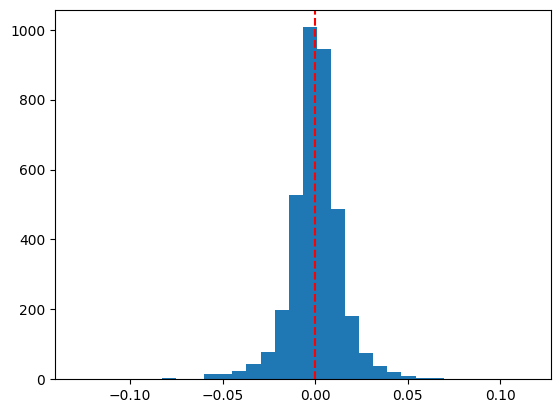

In [3]:
import numpy as np
import matplotlib.pyplot as plt

daily_returns = np.empty(IBM['Close'].shape)
daily_returns[0] = float('NaN')
daily_returns[1:] = np.ediff1d(IBM['Close']) / IBM['Close'][:-1]
IBM['Daily Returns'] = daily_returns

num_bins = 32
plt.hist(daily_returns, bins=num_bins)
plt.axvline(x=0, color='red', linestyle='--')
plt.show()

We factorize the daily returns into discrete classes.

In [4]:
binary_decision = (daily_returns > 0).astype(int)
IBM['Binary Decision'] = binary_decision

CUTOFF = 0.005
ternary_decision = np.full(shape=daily_returns.shape, fill_value=1)
ternary_decision[np.where(daily_returns > CUTOFF)] = 2
ternary_decision[np.where(daily_returns < CUTOFF)] = 0
IBM['Ternary Decision'] = ternary_decision

NUM_CLASSES = 6
IBM['Daily Returns Class'] = pd.qcut(IBM['Daily Returns'], q=NUM_CLASSES)
print(IBM.head(5))
IBM['Daily Returns Class'], _ = IBM['Daily Returns Class'].factorize(sort=True)
IBM.head(5)

                 Open        High        Low       Close    Volume   Adjusted  \
Date                                                                            
2007-01-03  97.180000   98.400002  96.260002   97.269997   9196800  63.127567   
2007-01-04  97.250000   98.790001  96.879997   98.309998  10524500  63.802544   
2007-01-05  97.599998   97.949997  96.910004   97.419998   7221300  63.224930   
2007-01-08  98.500000   99.500000  98.349998   98.900002  10340000  64.185463   
2007-01-09  99.080002  100.330002  99.070000  100.070000  11108200  64.944771   

            Daily Returns  Binary Decision  Ternary Decision  \
Date                                                           
2007-01-03            NaN                0                 1   
2007-01-04       0.010692                1                 2   
2007-01-05      -0.009053                0                 0   
2007-01-08       0.015192                1                 2   
2007-01-09       0.011830                1      

,Open,High,Low,Close,Volume,Adjusted,Daily Returns,Binary Decision,Ternary Decision,Daily Returns Class
Date,,,,,,,,,,
2007-01-03,97.180000,98.400002,96.260002,97.269997,9196800,63.127567,NaN,0,1,-1
2007-01-04,97.250000,98.790001,96.879997,98.309998,10524500,63.802544,0.010692,1,2,4
2007-01-05,97.599998,97.949997,96.910004,97.419998,7221300,63.224930,-0.009053,0,0,1
2007-01-08,98.500000,99.500000,98.349998,98.900002,10340000,64.185463,0.015192,1,2,5
2007-01-09,99.080002,100.330002,99.070000,100.070000,11108200,64.944771,0.011830,1,2,5


Next we compute some simple moving average and drop the first rows due to `NaN`s.

In [5]:
sma_features = []
sma_periods = [5, 10, 20, 50, 200]
for period in sma_periods:
    label = 'SMA-{}'.format(period)
    sma_features.append(label)

    IBM[label] = IBM['Close'].rolling(period).mean()
    #IBM[['Close', label]].plot(label=label, figsize=(9, 3), xlabel='days', ylabel='price')

IBM = IBM.iloc[max(sma_periods):, :]
IBM.head(5)

,Open,High,Low,Close,Volume,Adjusted,Daily Returns,Binary Decision,Ternary Decision,Daily Returns Class,SMA-5,SMA-10,SMA-20,SMA-50,SMA-200
Date,,,,,,,,,,,,,,,
2007-10-18,114.820000,116.410004,114.440002,114.800003,7736500,75.285088,-0.008464,0,0,1,117.203999,117.506001,117.344501,115.320200,105.19595
2007-10-19,113.980003,114.930000,111.800003,112.279999,10327200,73.632500,-0.021951,0,0,0,116.098000,117.104000,117.119501,115.351200,105.26580
2007-10-22,110.970001,113.879997,110.959999,113.370003,7576900,74.347313,0.009708,1,2,4,115.166000,116.664001,116.975501,115.365800,105.34555
2007-10-23,113.779999,114.800003,113.500000,114.680000,5562900,75.206367,0.011555,1,2,5,114.182001,116.302000,116.884001,115.405201,105.42445
2007-10-24,114.199997,114.449997,111.680000,112.949997,8072600,74.071869,-0.015085,0,0,0,113.616000,115.735000,116.666501,115.423200,105.48885


In [6]:
all_features = ['Volume'] + sma_features

In [7]:
from typing import Any
import numpy as np
from util import kfold_eval


def svm_performance(svm: Any, target_feature: str = 'Daily Returns Class', k: int = 5, average: Any = 'binary', zero_division: Any = 'warn') -> (np.array, np.array, np.array, np.array):
    """
    Performs a k-fold cross-validation on an SVM with the specified kernel.

    :param svm: The SVM model
    :param target_feature: default='Daily Returns Class': The target feature
    :param k: how many folds to perform
    :param average: default='binary': This parameter is required for multiclass/multilabel targets.
    :param zero_division: default='warn'

    :return: accuracy, precision, recall, f1
    """
    X = IBM[all_features]
    y = IBM[target_feature]

    return kfold_eval(model=svm, X=X, y=y, k=k, average=average, zero_division=zero_division)

## Show the Comparison of the Performance of the Kernels
We test the performance towards the default target feature `Daily Returns Class`:

In [8]:
from sklearn.svm import SVC, LinearSVC

kernels = {
    'Linear SVM Kernel': LinearSVC(dual=False), # dual=False as according to their documentation (n_samples > n_features)
    'Poly SVM Kernel': SVC(kernel='poly'),
    'Rbf SVM Kernel': SVC(kernel='rbf'),
    'Sigmoid SVM Kernel': SVC(kernel='sigmoid'),
}

for name, kernel in kernels.items():
    print(f'{name}:')
    a, p, r, f = svm_performance(kernel, k=5, average='macro', zero_division=0)
    data = {
        'Fold': range(1, 6),
        'Accuracy': a,
        'Precision': p,
        'Recall': r,
        'F1-Score': f,
    }

    scores = pd.DataFrame(data).set_index('Fold')
    display(scores)

Linear SVM Kernel:


,Accuracy,Precision,Recall,F1-Score
Fold,,,,
1,0.234621,0.165657,0.039671,0.064012
2,0.194564,0.211131,0.064044,0.097587
3,0.199140,0.208811,0.073026,0.099499
4,0.176218,0.210226,0.068926,0.100221
5,0.236390,0.232206,0.081744,0.119223


Poly SVM Kernel:


,Accuracy,Precision,Recall,F1-Score
Fold,,,,
1,0.224607,0.215828,0.152292,0.139407
2,0.175966,0.198192,0.077518,0.089679
3,0.171920,0.173986,0.086523,0.073591
4,0.180516,0.202730,0.092665,0.096863
5,0.184814,0.202756,0.102925,0.098750


Rbf SVM Kernel:


,Accuracy,Precision,Recall,F1-Score
Fold,,,,
1,0.244635,0.183614,0.160767,0.137584
2,0.206009,0.213733,0.133050,0.162603
3,0.229226,0.235573,0.202630,0.174688
4,0.212034,0.206385,0.187544,0.191321
5,0.220630,0.229196,0.243981,0.190238


Sigmoid SVM Kernel:


,Accuracy,Precision,Recall,F1-Score
Fold,,,,
1,0.241774,0.175552,0.270705,0.087287
2,0.150215,0.173614,0.208293,0.106200
3,0.193410,0.211105,0.187780,0.144466
4,0.161891,0.198031,0.146077,0.126433
5,0.150430,0.146782,0.101022,0.099785


We test the performance towards `Ternary Decision`:

In [9]:
from sklearn.svm import SVC, LinearSVC

kernels = {
    'Linear SVM Kernel': LinearSVC(dual=False), # dual=False as according to their documentation (n_samples > n_features)
    'Poly SVM Kernel': SVC(kernel='poly'),
    'Rbf SVM Kernel': SVC(kernel='rbf'),
    'Sigmoid SVM Kernel': SVC(kernel='sigmoid'),
}

for name, kernel in kernels.items():
    print(f'{name}:')
    a, p, r, f = svm_performance(kernel, target_feature='Ternary Decision', k=5, average='macro', zero_division=0)
    data = {
        'Fold': range(1, 6),
        'Accuracy': a,
        'Precision': p,
        'Recall': r,
        'F1-Score': f,
    }

    scores = pd.DataFrame(data).set_index('Fold')
    display(scores)

Linear SVM Kernel:


,Accuracy,Precision,Recall,F1-Score
Fold,,,,
1,0.623748,0.5,0.311874,0.384141
2,0.693848,0.5,0.346924,0.409628
3,0.702006,0.5,0.351003,0.412458
4,0.729226,0.5,0.364613,0.421707
5,0.638968,0.5,0.319484,0.389860


Poly SVM Kernel:


,Accuracy,Precision,Recall,F1-Score
Fold,,,,
1,0.623748,0.5,0.311874,0.384141
2,0.693848,0.5,0.346924,0.409628
3,0.702006,0.5,0.351003,0.412458
4,0.729226,0.5,0.364613,0.421707
5,0.638968,0.5,0.319484,0.389860


Rbf SVM Kernel:


,Accuracy,Precision,Recall,F1-Score
Fold,,,,
1,0.623748,0.500000,0.311874,0.384141
2,0.693848,0.500000,0.346924,0.409628
3,0.702006,0.500000,0.351003,0.412458
4,0.717765,0.492141,0.363043,0.417848
5,0.638968,0.500000,0.319484,0.389860


Sigmoid SVM Kernel:


,Accuracy,Precision,Recall,F1-Score
Fold,,,,
1,0.609442,0.490041,0.380918,0.385454
2,0.507868,0.471727,0.475308,0.467254
3,0.557307,0.531132,0.526690,0.519831
4,0.535817,0.478820,0.482344,0.473580
5,0.575931,0.494688,0.492592,0.479844
